In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
train_df.sample()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
46978  46978   I    0.28     0.205    0.07        0.1055          0.0375   

       Whole weight.2  Shell weight  Rings  
46978          0.0235          0.03      6

In [3]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
test_df.sample()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
60007  150622   I   0.445      0.34    0.11          0.38          0.1625   

       Whole weight.2  Shell weight  
60007          0.0705         0.125

In [4]:
col_mapping = {'Whole weight': 'Whole_weight', 'Whole weight.1': 'Whole_weight_1',\
              'Whole weight.2': 'Whole_weight_2', 'Shell weight':'Shell_weight'}
train_df.rename(columns=col_mapping, inplace=True)
test_df.rename(columns=col_mapping, inplace=True)

In [5]:
train_df.head(10)

id Sex  Length  Diameter  Height  Whole_weight  Whole_weight_1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   
5   5   F   0.610     0.480   0.170        1.2010          0.5335   
6   6   M   0.415     0.325   0.110        0.3315          0.1655   
7   7   F   0.610     0.490   0.150        1.1165          0.4955   
8   8   I   0.205     0.150   0.040        0.0460          0.0145   
9   9   I   0.565     0.425   0.125        0.6510          0.3795   

   Whole_weight_2  Shell_weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  
5          0.3135        0.3085     10  
6          0.0715        0.1300      9  
7          0.2945        0.2950      9  
8          0.0105        0.0100      4  
9          0.1420        0.1800      8

In [6]:
original_df = pd.read_csv('/kaggle/input/playgrounds4e04originaldata/Original.csv')
original_df.sample()

id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2986  2986   M   0.535     0.405   0.175        1.2705           0.548   

      Viscera_weight  Shell_weight  Rings  
2986          0.3265         0.337     13

In [7]:
col_mapping = { 'Shucked_weight': 'Whole_weight_1','Viscera_weight': 'Whole_weight_2'}
original_df.rename(columns=col_mapping, inplace=True)

In [8]:
original_df.sample()

id Sex  Length  Diameter  Height  Whole_weight  Whole_weight_1  \
218  218   M    0.47      0.36   0.135         0.501          0.1665   

     Whole_weight_2  Shell_weight  Rings  
218           0.115         0.165     10

In [9]:
print(f"The shape of train df: {train_df.shape}")
print(f"The shape of test df: {test_df.shape}")
print(f"The shape of original df: {original_df.shape}")

The shape of train df: (90615, 10)
The shape of test df: (60411, 9)
The shape of original df: (4177, 10)


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole_weight    90615 non-null  float64
 6   Whole_weight_1  90615 non-null  float64
 7   Whole_weight_2  90615 non-null  float64
 8   Shell_weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole_weight    60411 non-null  float64
 6   Whole_weight_1  60411 non-null  float64
 7   Whole_weight_2  60411 non-null  float64
 8   Shell_weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Whole_weight_1  4177 non-null   float64
 7   Whole_weight_2  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [13]:
train_df.describe()

id        Length      Diameter        Height  Whole_weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole_weight_1  Whole_weight_2  Shell_weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

In [14]:
test_df.describe()

id        Length      Diameter        Height  Whole_weight  \
count   60411.000000  60411.000000  60411.000000  60411.000000  60411.000000   
mean   120820.000000      0.517428      0.401961      0.135751      0.790062   
std     17439.297893      0.117609      0.097470      0.038175      0.457591   
min     90615.000000      0.075000      0.055000      0.000000      0.002000   
25%    105717.500000      0.450000      0.345000      0.110000      0.419500   
50%    120820.000000      0.545000      0.425000      0.140000      0.801500   
75%    135922.500000      0.600000      0.470000      0.160000      1.070000   
max    151025.000000      0.800000      0.650000      1.095000      2.825500   

       Whole_weight_1  Whole_weight_2  Shell_weight  
count    60411.000000    60411.000000  60411.000000  
mean         0.341227        0.169419      0.226125  
std          0.204221        0.100720      0.129826  
min          0.001000        0.000500      0.001500  
25%          0.178500        0.086500      0.120000  
50%          0.329000        0.166000      0.225000  
75%          0.464500        0.232500      0.305000  
max          1.488000        0.641500      1.004000

In [15]:
original_df.describe()

id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%    1044.000000     0.450000     0.350000     0.115000      0.441500   
50%    2088.000000     0.545000     0.425000     0.140000      0.799500   
75%    3132.000000     0.615000     0.480000     0.165000      1.153000   
max    4176.000000     0.815000     0.650000     1.130000      2.825500   

       Whole_weight_1  Whole_weight_2  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     1.000000  
25%          0.186000        0.093500      0.130000     8.000000  
50%          0.336000        0.171000      0.234000     9.000000  
75%          0.502000        0.253000      0.329000    11.000000  
max          1.488000        0.760000      1.005000    29.000000

In [16]:
train_df.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [17]:
test_df.Sex.value_counts()


Sex
I    22241
M    20783
F    17387
Name: count, dtype: int64

In [18]:
original_df.Sex.value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

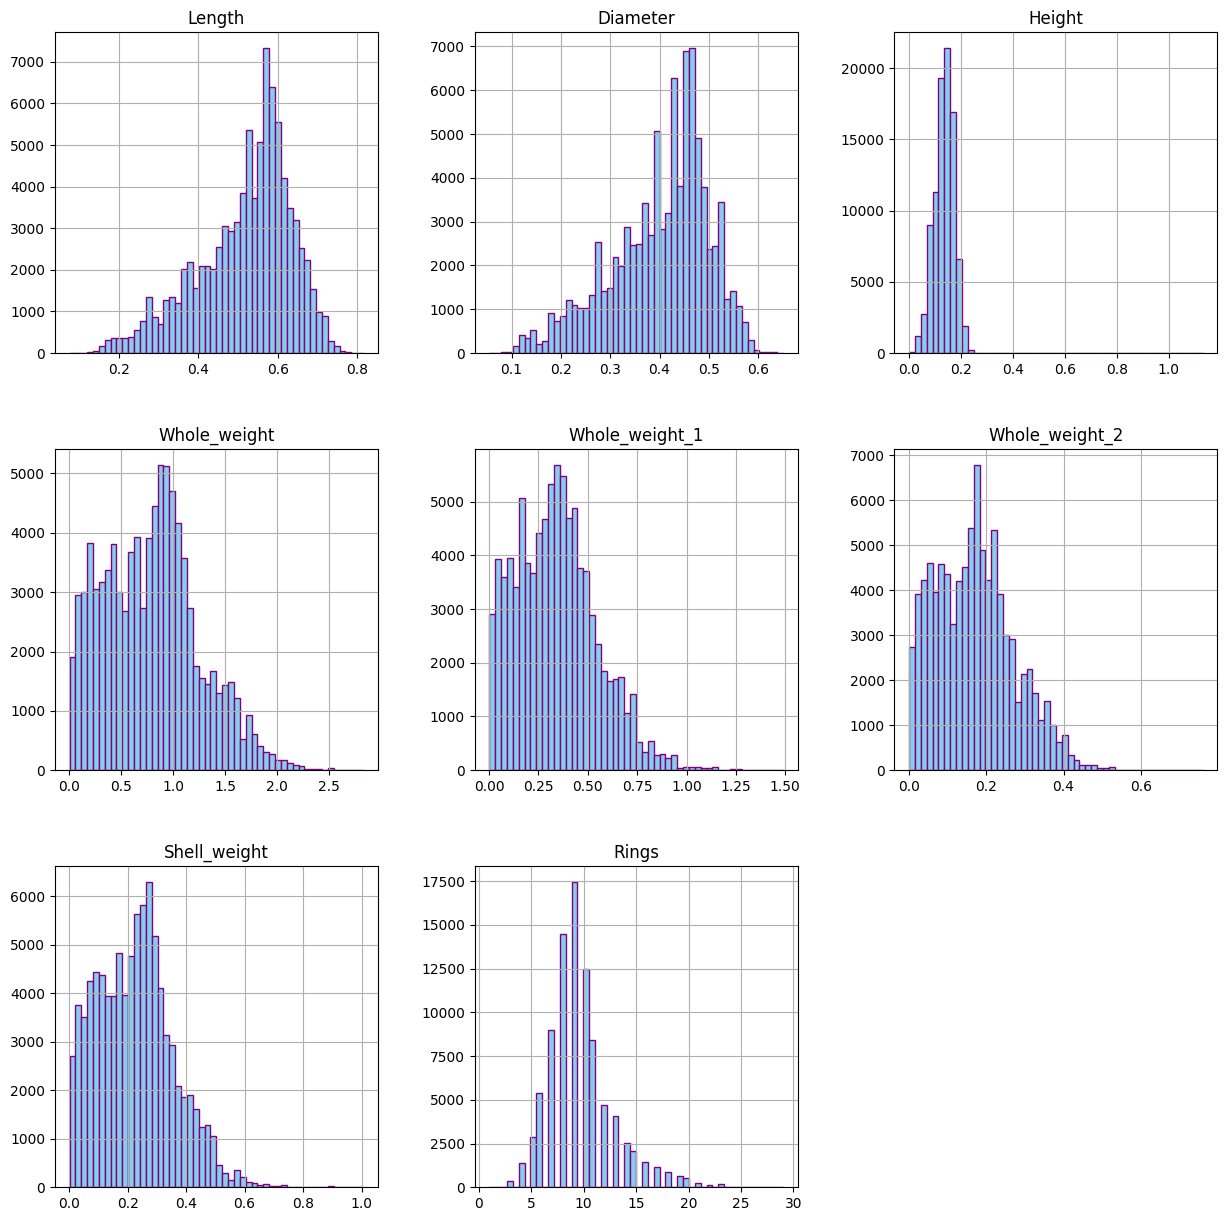

In [19]:
num_col = train_df.columns[1:]
train_df[num_col].hist(figsize=(15, 15), color='skyblue', edgecolor='purple', bins=50)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 0, 'Abalone Rings')

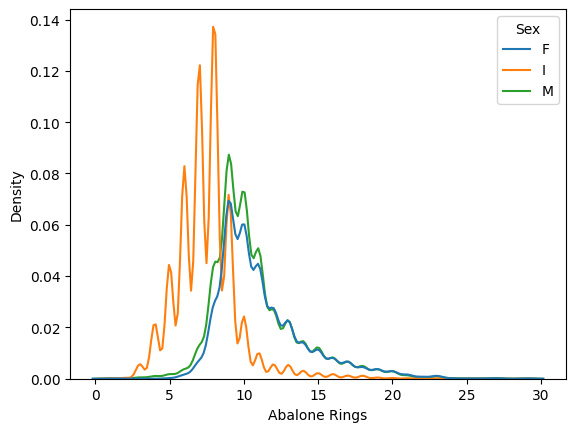

In [20]:
ax = sns.kdeplot(data=train_df, x="Rings",hue='Sex')
ax.set_xlabel('Abalone Rings')

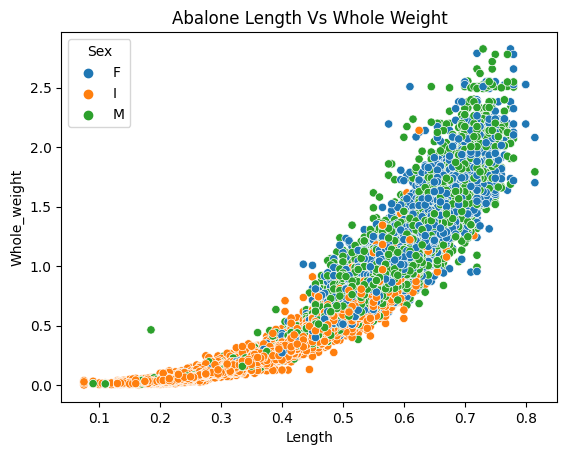

In [21]:
ax = sns.scatterplot(x='Length',
                     y='Whole_weight',
                     hue='Sex'
                     ,data=train_df)
ax.set_title("Abalone Length Vs Whole Weight")
plt.show()

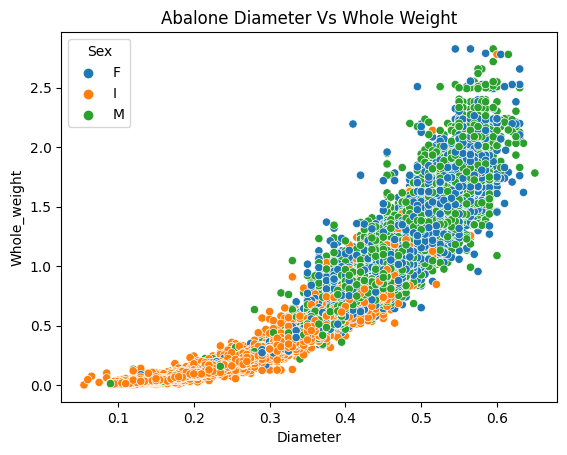

In [22]:
ax = sns.scatterplot(x='Diameter',
                     y='Whole_weight',
                     hue='Sex'
                     ,data=train_df)
ax.set_title("Abalone Diameter Vs Whole Weight")
plt.show()

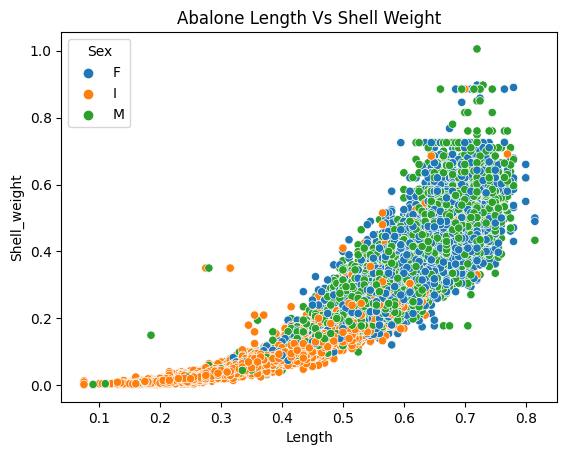

In [23]:
ax = sns.scatterplot(x='Length',
                     y='Shell_weight',
                     hue='Sex'
                     ,data=train_df)
ax.set_title("Abalone Length Vs Shell Weight")
plt.show()

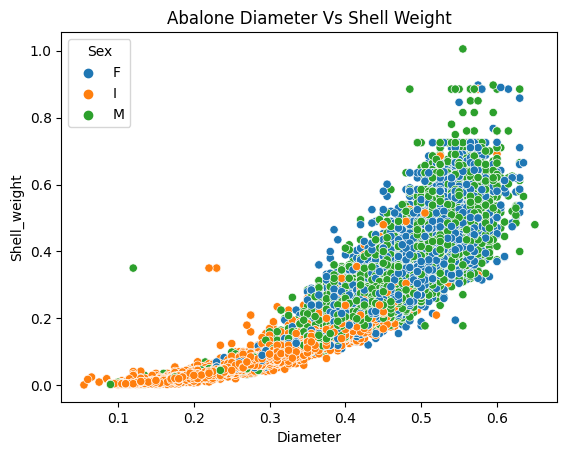

In [24]:
ax = sns.scatterplot(x='Diameter',
                     y='Shell_weight',
                     hue='Sex'
                     ,data=train_df)
ax.set_title("Abalone Diameter Vs Shell Weight")
plt.show()

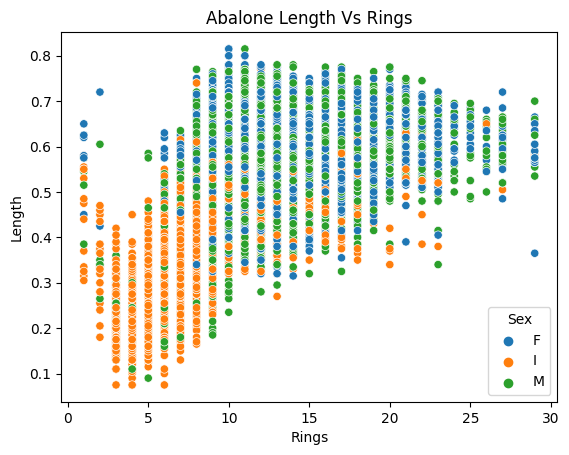

In [25]:
ax = sns.scatterplot(x='Rings',
                    y='Length',
                    hue='Sex',
                    data=train_df)
ax.set_title("Abalone Length Vs Rings")
plt.show()

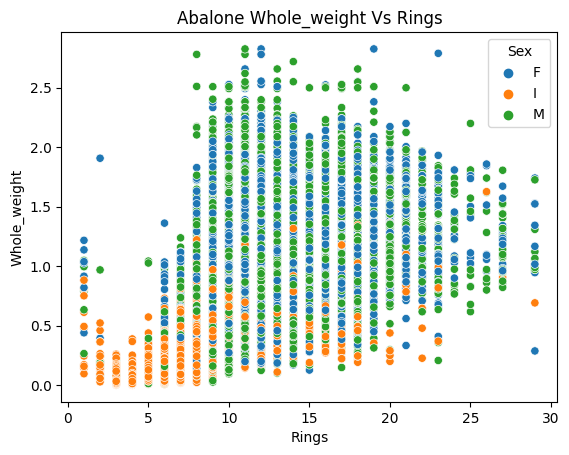

In [26]:
ax = sns.scatterplot(x='Rings',
                    y='Whole_weight',
                    hue='Sex',
                    data=train_df)
ax.set_title("Abalone Whole_weight Vs Rings")
plt.show()

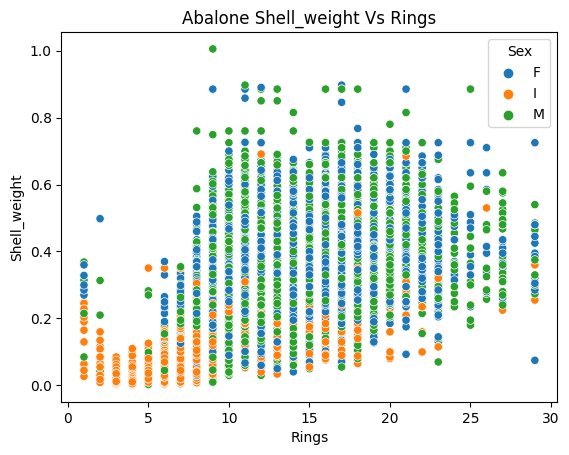

In [27]:
ax = sns.scatterplot(x='Rings',
                    y='Shell_weight',
                    hue='Sex',
                    data=train_df)
ax.set_title("Abalone Shell_weight Vs Rings")
plt.show()

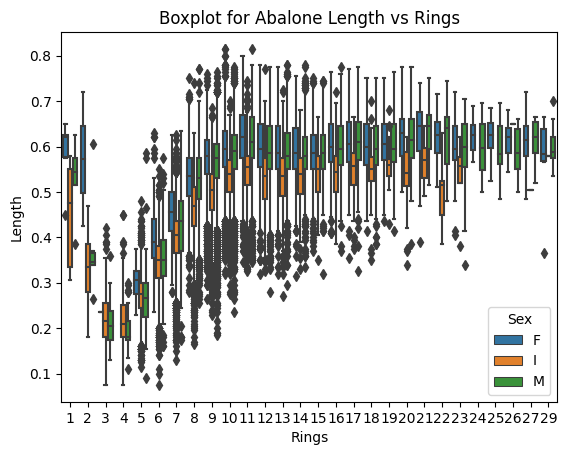

In [28]:
ax = sns.boxplot(data=train_df,
                 x="Rings",
                y="Length",
                hue="Sex",
                )
ax.set_title("Boxplot for Abalone Length vs Rings")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

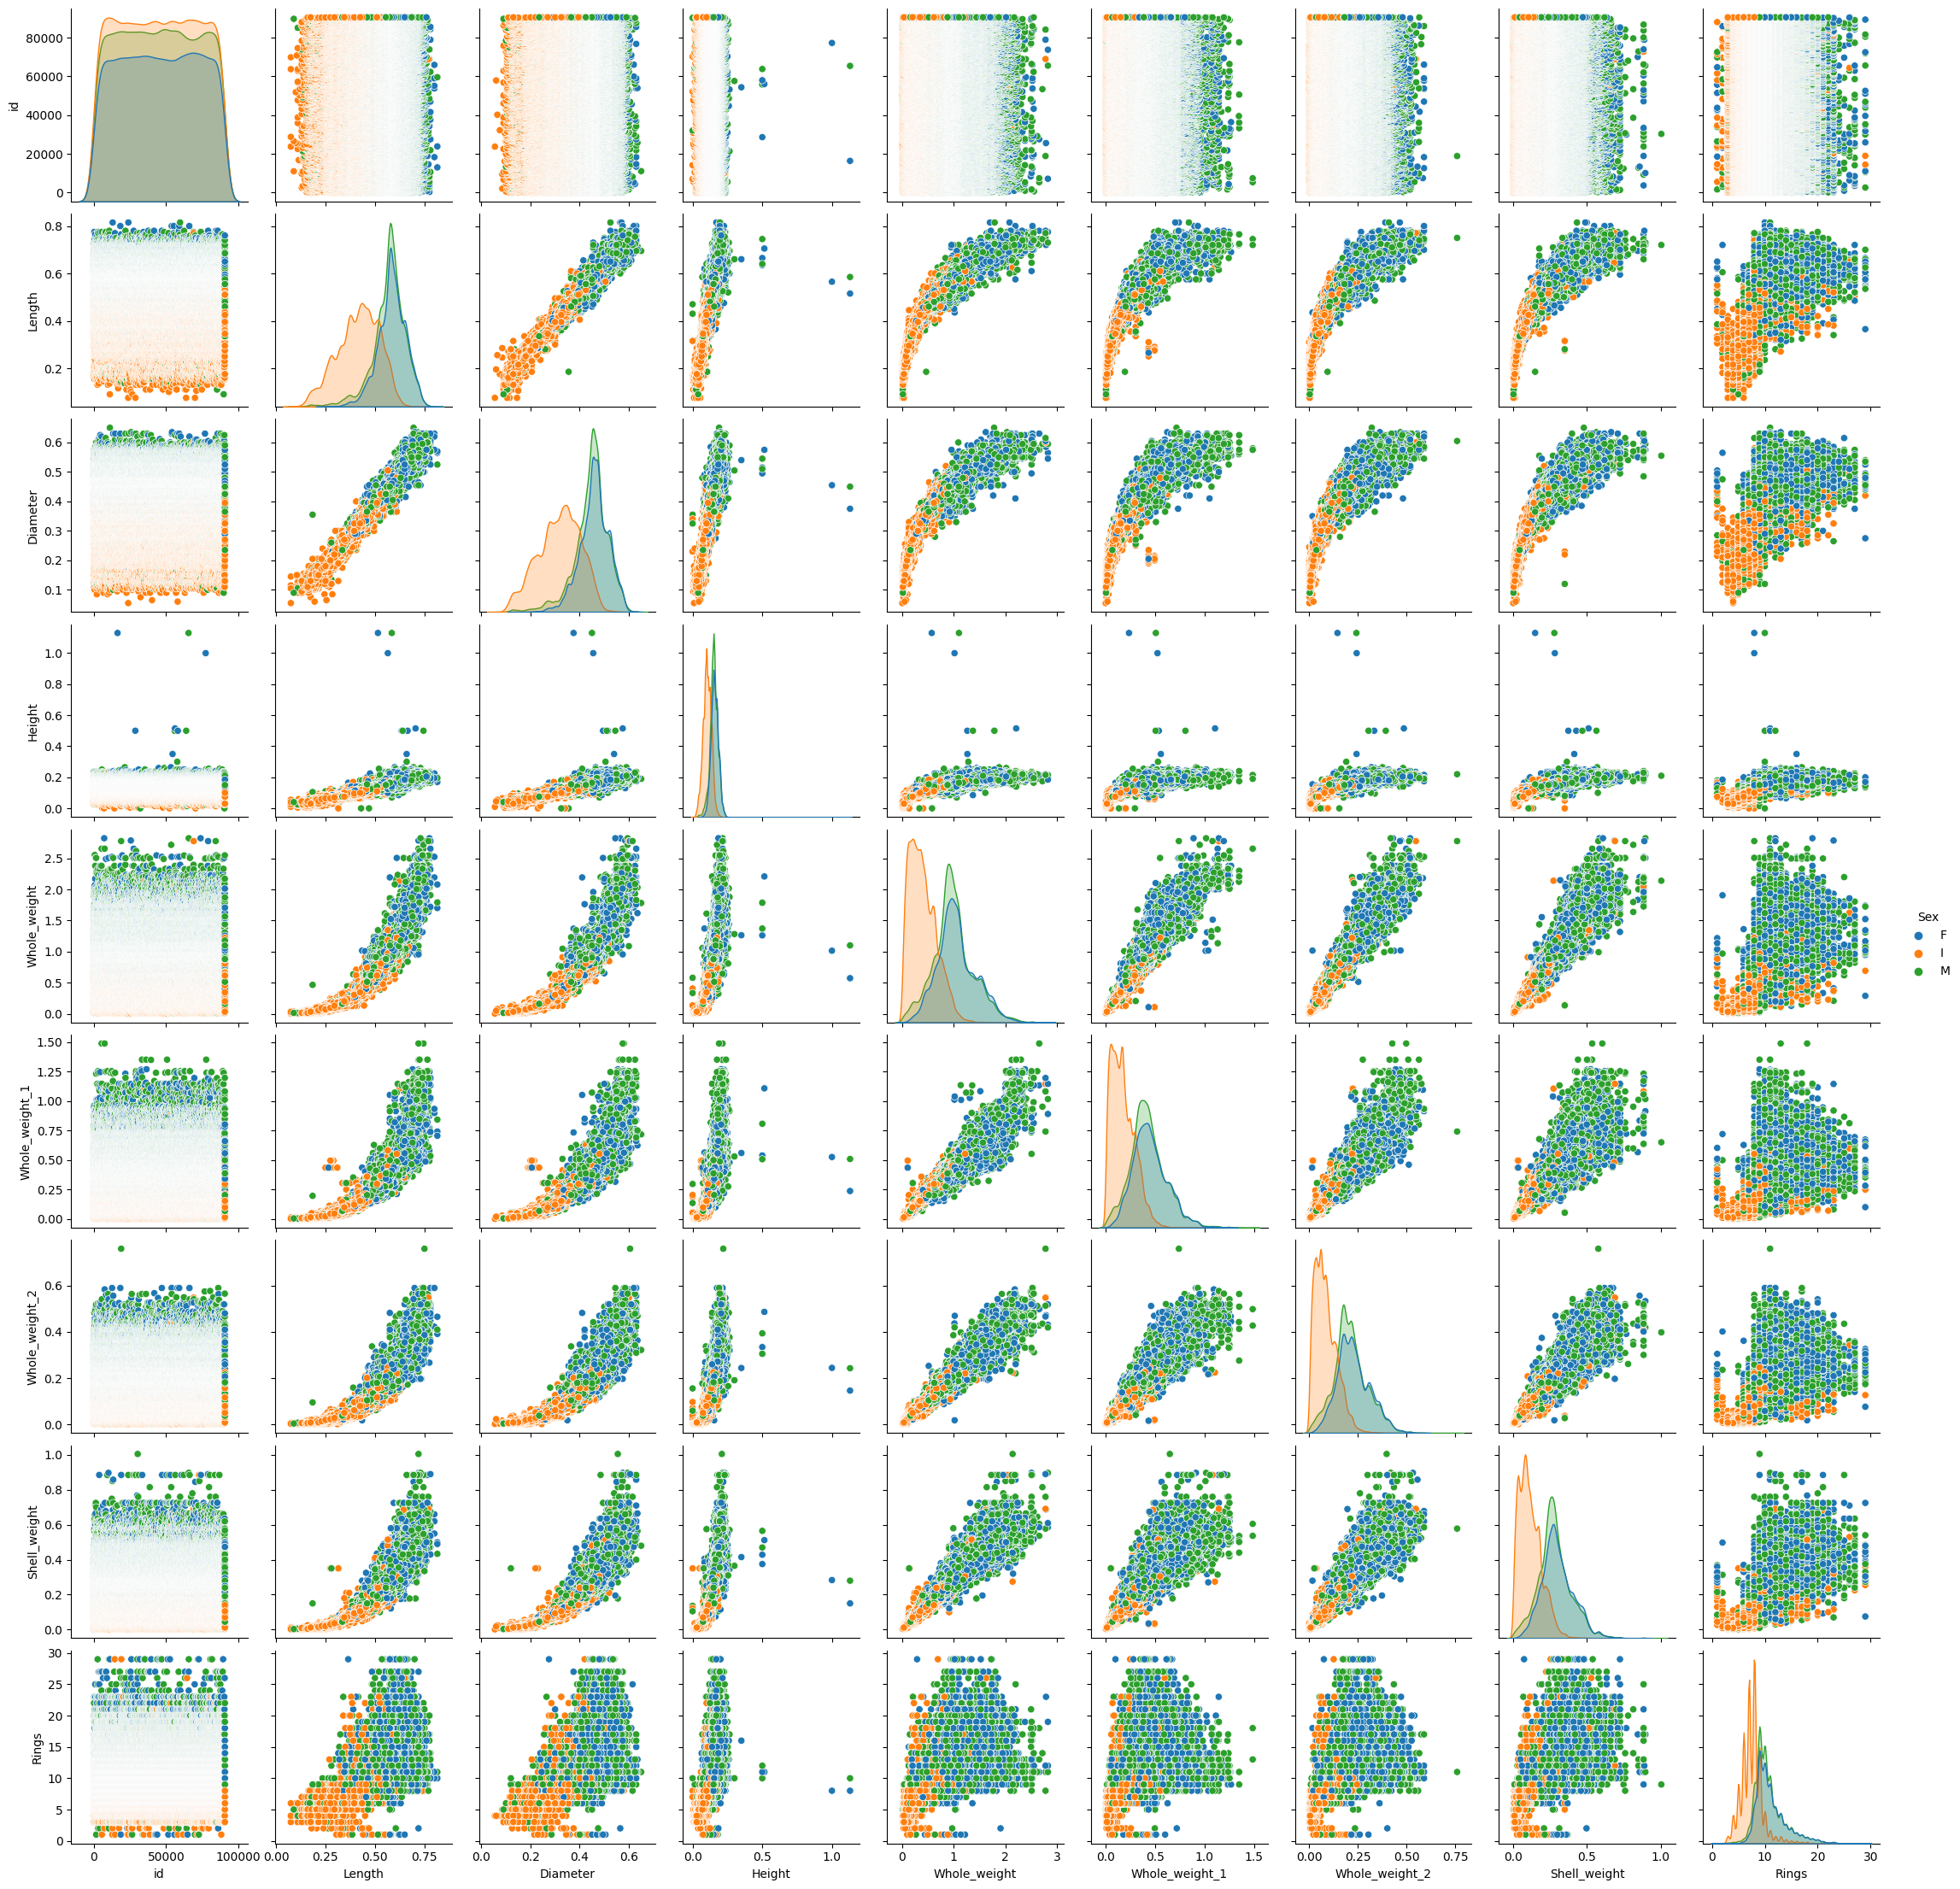

In [29]:
sns.pairplot(train_df,hue="Sex")
plt.show()

In [30]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings'],
      dtype='object')

In [31]:
vars_col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings']

In [32]:
df_corr = train_df[['Length', 'Diameter', 'Height', 'Whole_weight',
       'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings']].corr()

<Axes: >

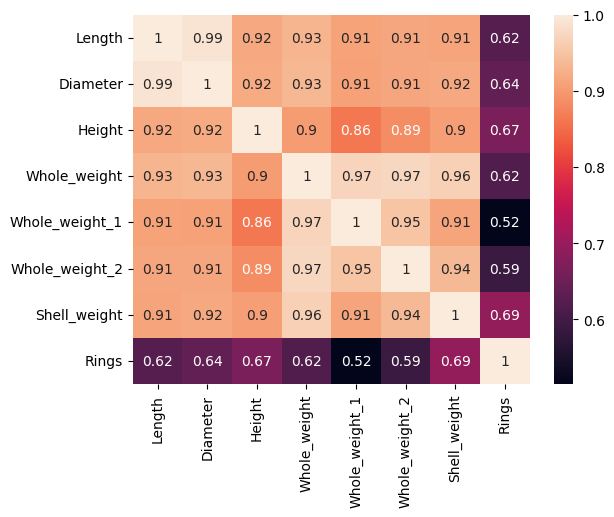

In [33]:
sns.heatmap(df_corr, annot=True)

In [34]:
train_df['Volume'] = train_df['Diameter'] * train_df['Length'] * train_df['Height']

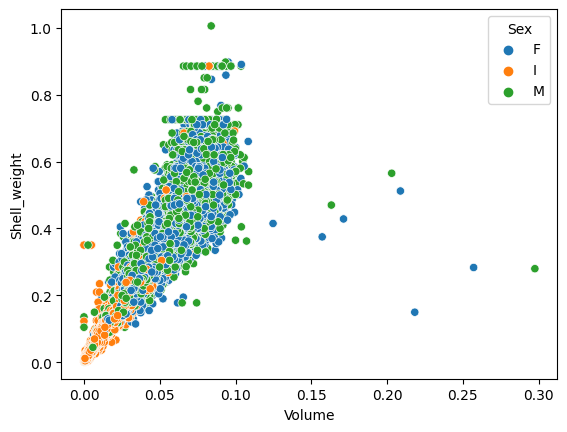

In [35]:
ax = sns.scatterplot(x='Volume',
                    y='Shell_weight',
                    hue="Sex",
                    data=train_df)
plt.show()

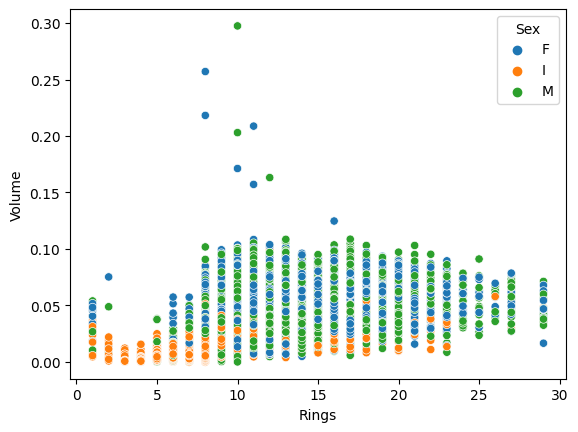

In [36]:
ax = sns.scatterplot(x='Rings',
                    y='Volume',
                    hue="Sex",
                    data=train_df)
plt.show()

In [37]:
df_corr1 = train_df[['Length', 'Diameter', 'Height', 'Whole_weight',
       'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings', 'Volume']].corr()

<Axes: >

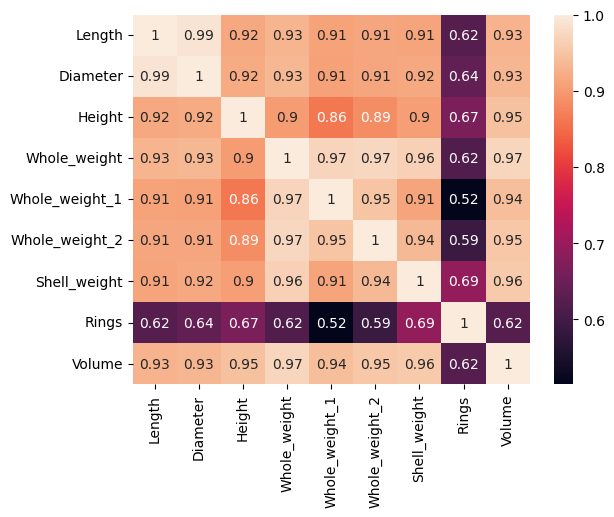

In [38]:
sns.heatmap(df_corr1, annot=True)

In [39]:
original_df['Volume'] = original_df['Diameter'] * original_df['Length'] * original_df['Height']
original_df

id Sex  Length  Diameter  Height  Whole_weight  Whole_weight_1  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Whole_weight_2  Shell_weight  Rings    Volume  
0             0.1010        0.1500     15  0.015777  
1             0.0485        0.0700      7  0.008347  
2             0.1415        0.2100      9  0.030051  
3             0.1140        0.1550     10  0.020075  
4             0.0395        0.0550      7  0.006732  
...              ...           ...    ...       ...  
4172          0.2390        0.2490     11  0.041951  
4173          0.2145        0.2605     10  0.035046  
4174          0.2875        0.3080      9  0.058425  
4175          0.2610        0.2960     10  0.045469  
4176          0.3765        0.4950     12  0.076840  

[4177 rows x 11 columns]

In [40]:
df_corr2 = original_df[['Length', 'Diameter', 'Height', 'Whole_weight',
       'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings', 'Volume']].corr()

<Axes: >

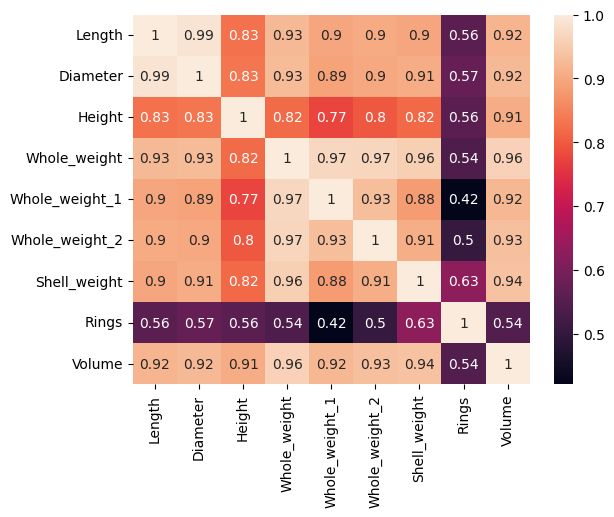

In [41]:
sns.heatmap(df_corr2, annot=True)

In [42]:
train_df.groupby('Sex')[['Rings', "Shell_weight", "Volume"]].agg(['max', 'min', 'mean'])

Rings                Shell_weight                      Volume            \
      max min       mean          max     min      mean       max       min   
Sex                                                                           
F      29   1  11.161389        0.897  0.0090  0.301273  0.257075  0.001762   
I      29   1   7.533557        0.885  0.0015  0.114645  0.099330  0.000000   
M      29   1  10.753408        1.005  0.0015  0.280194  0.297472  0.000000   

               
         mean  
Sex            
F    0.044112  
I    0.016231  
M    0.040959